# **Lab 4: First Draft of Final Project**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

This lab is meant to be the first draft of motivation, methods, and one result for the final project of the class. In this lab, you will select a topic to investigate and perform an analysis to understand if this topic is of sufficient interest to use as a final project. You will be writing down many of these aspects in preparation for a final project presentation. 

For the final class project, you should investigate a topic from the course of your choosing. This topic can be related to anything we have discussed. For instance, you might choose to investigate a new implementation of Stable Diffusion training with an alternative latent space function (or new form of cross attention). Please do not let this example bias your choosing of a project--the topic you choose to investigate does not need to be a new algorithmic approach. It could be a new application of an algorithm we discussed. For instance, you might choose to use multi-task modeling for assessing robotic surgery. Or you might choose a new topic in ethical considerations of models. The only requirement is that the idea be something that creates new knowledge in the world and is somehow related to the vast number of topics we discussed in the class. 

Any topic can be chosen from ethical machine learning, convolutional visualization, data generation (with VAE's or GANs), multi-task or multi-modal architectures, stable diffusion, style transfer, or reinforcement learning. 

This lab will help you to ensure that the topic is appropriate for a final project in the course in terms of scope (not so easy that it might considered trivial, but not so hard that it might be considered a full blown dissertation). The right aim of scope should be such that you are investigating the initial analysis of a research topic--but there would still be much work to do for a full research publication. If you are unsure if your topic is appropriate, please contact the instructor for feedback.


# **Objective**
For our final project, we explore the application of **Reinforcement Learning** (RL) to the domain of **autonomous vehicles**, focusing on how RL can improve safety and decision-making processes in dynamic driving environments. Our analysis involves using a **simulated highway environment** (via highway-env) to train an RL agent to perform basic tasks like navigation, obstacle avoidance, and interaction with other vehicles. By implementing and testing different RL algorithms, we seek to understand their effectiveness in making real-time driving decisions and to analyze how these algorithms can be adapted for real-world applications.

Our **primary objective** is to determine how RL can be used to teach an autonomous vehicle to navigate safely and efficiently within a simulated environment, and to assess the performance of different algorithms in handling complex driving scenarios. Additionally, we will explore the broader implications of RL in autonomous driving, including safety, efficiency, and ethics, with the goal of providing insights into potential challenges when deploying RL-based systems in real-wrold autonomous vehicles. 

### **Terminology Used in This Project**
To ensure clarity and understanding in our analysis, we defined the following key terms use throughout our project:
- Reinforcement Learning (RL): A type of machine learning where an agent learns to make decisions by interacting with an environment, receiving rewards or penalties based on its actions (Medium)
- Agent: The autonomous vehicle in this scenario, which learns to navigate and make driving decisions based on the environment and rewards. (OpenAI Spinning Up)
- Environment: The simulated world in which the agent operates, which includes roads, traffic signs, other vehicles, pedestrians, and obstacles (OpenAI Spinning Up)
- State: A specific configuration of the environment, such as the position and speed of the vehicle, the distance to obstacles, or the presence of other cars. (OpenAI Spinning Up)
- Action: The decision made by the agent at a given state, such as steering left, speeding up, or braking. (OpenAI Spinning Up)
- Reward: A value assigned to the agent's actions, which helps it learn which behaviors are desirable (e.g., avoiding collisions or following traffic laws). (OpenAI Spinning Up)
- Q-Learning / Deep Q-Networks (DQN): RL algorithms used to estimate the expected future rewards for each action, helping the agent make optimal decisions in a given state. (HuggingFace)
- Proximal Policy Optimization (PPO): A state-of-the-art RL algorithm used for training in environments with large action spaces, such as controlling a vehicle's speed and direction. (HuggingFace)

Sources:
- Medium: https://medium.com/%40gurkanc/deep-reinforcement-learning-agents-algorithms-and-strategies-a-practical-game-scenario-a412428ae0e0
- OpenAI Spinning Up - Intro to RL: https://spinningup.openai.com/en/latest/spinningup/rl_intro.html
- HuggingFace: https://huggingface.co/learn/deep-rl-course/en/unit3/from-q-to-dqn
- HuggingFace: https://huggingface.co/blog/deep-rl-ppo

References:
- https://github.com/Farama-Foundation/HighwayEnv?tab=readme-ov-file

# **1. Motivation**

[5 Points] 
- Motivate the need for the research project. 
- Why is this investigation important? 
- What related work are you building from? 
- What are the main research question(s)? 
- What is your hypothesis for what will happen? 
- This section should be something that can be converted into two or three slides for the final presentation. 
- You should write down the motivations and related work that will be presented to the instructor later on.  

## **1.1 Motivation for Our Research Project**
Autonomous vehicles (AVs) represent one of the most transformative innovations in the modern transportation industry. While the technological advancements are promising from current projects like Waymo, the ability of AVs to make safe, efficient, and ethical driving decisions in real-time remains a critical challenge. AVs operate in highly dynamic environments with unpredictable conditions such as varying traffic patterns, road conditions, weather, and interactions with pedestrians and other vehicles. Reinforcement learning offers an opportunity to optimize the decision-making process through experience-based learning.

The **motivation behind this project is to investigate how RL can improve AVs’ performance in terms of safety, efficiency, and adaptability**. By utilizing RL algorithms, we hope to enhance the vehicle’s ability to learn from its environment and make intelligent decisions, such as when to accelerate, brake, and avoid obstacles. These algorithms can also learn from different driving scenarios, enabling the vehicle to perform better in diverse real-world conditions, potentially reducing accidents and improving traffic flow.

The need for autonomous vehicles stems from a broader societal context. Human error accounts for the overwhelming majority of traffic accidents, and autonomous systems offer the potential to significantly reduce these numbers by eliminating distractions, fatigue, and impaired judgment. Moreover, AVs can provide mobility for individuals who are unable to drive, increase transportation efficiency through intelligent routing and coordination, and contribute to environmental sustainability by reducing emissions through smoother, optimized driving. As we move toward a future where AVs are more widely deployed, it becomes increasingly important to ensure these systems are capable of making real-time, intelligent decisions in complex environments. This project contributes to that goal by exploring reinforcement learning as a scalable, adaptable framework for safe and intelligent autonomous driving.

## **1.2 Why is this investigation important?**
The importance of this research lies in addressing two of the most pressing challenges in the field of autonomous driving: safety and real-time decision-making in uncertain environments. While modern autonomous vehicle (AV) systems—such as Tesla’s Autopilot, Waymo’s Driver, and Cruise’s Origin platform—have demonstrated considerable progress, they remain limited in their ability to respond effectively to emergent, high-stakes scenarios. These include sudden pedestrian crossings, dynamic lane changes, traffic signal malfunctions, construction detours, and adverse weather conditions like heavy rain or fog. Several high-profile incidents underscore this limitation.

In 2023, Cruise paused all autonomous operations across the United States after an incident in San Francisco where one of its vehicles failed to yield appropriately and dragged a pedestrian following a collision caused by another car. Similarly, Tesla’s Autopilot and Full Self-Driving (FSD) systems have faced multiple investigations by the National Highway Traffic Safety Administration (NHTSA) due to collisions with stationary emergency vehicles and phantom braking events. Even Waymo, considered one of the most technically mature systems, has encountered issues with overly cautious behavior—such as freezing in intersections or failing to merge—causing confusion for human drivers and traffic flow disruptions.

These failures are rooted in the rigidity of current AV decision-making frameworks, which are largely deterministic or supervised-learning-based. Such systems rely on predefined rules or behavior learned from labeled datasets, limiting their ability to generalize to rare or novel situations. As a result, they are often brittle, overly conservative, or prone to misclassification under conditions that diverge from their training data.

Reinforcement learning (RL) offers a compelling alternative by enabling agents to learn optimal policies through interaction and feedback. Rather than relying solely on human-designed heuristics, RL-based systems iteratively refine their behavior by observing the long-term consequences of their actions. This allows the AV to learn nuanced driving behaviors—such as yielding to aggressive drivers, dynamically rerouting around construction, or adjusting speed in low-visibility weather—that would be difficult to hand-code or annotate in large-scale datasets.

The relevance of this investigation is further underscored by the increasing push for AV deployment on public roads, where safety is a primary concern. According to the National Highway Traffic Safety Administration (NHTSA), over 90% of vehicular accidents are attributable to human error. As AVs are introduced into mixed traffic ecosystems, their ability to make adaptive, ethical, and reliable decisions in real time becomes critical—not only for reducing accidents but also for gaining public trust and regulatory approval.

This research aligns with the broader shift in the AV industry from rigid, rule-driven systems to flexible, learning-based models capable of continuous improvement. By evaluating RL algorithms in realistic, high-fidelity driving scenarios, this project contributes to the development of autonomous systems that are not just operational, but robust, scalable, and safe for large-scale adoption.

**Refrences** 
* National Highway Traffic Safety Administration (NHTSA). (2015). Critical Reasons for Crashes Investigated in the National Motor Vehicle Crash Causation Survey.
* Tesla AI Team. (2021). Tesla Autonomy Day / AI Day. https://www.tesla.com/AI
* Waymo Safety Report. (2020). https://waymo.com/safety
* Aradi, S. (2020). Survey of deep reinforcement learning for motion planning of autonomous vehicles. IEEE Transactions on Intelligent Transportation Systems, 22(6), 3023-3035.

## **1.3 Related Work**
There has been extensive work applying reinforcement learning (RL) to autonomous vehicles. Industry leaders such as Tesla and Waymo have pioneered systems capable of making real-time driving decisions using advanced machine learning. Tesla’s Autopilot leverages deep neural networks to detect lane lines, classify objects, and perform lane-change maneuvers in real time (Tesla AI Team, 2021). Waymo has taken a modular approach, combining deep learning and imitation learning to build fully autonomous vehicles that navigate complex urban environments (Waymo Team, 2020). Both companies rely on deep learning models for core control functions like steering, braking, and obstacle avoidance.

In academic research, simulation environments are widely used to train and evaluate RL-based driving agents. One such environment is highway-env, a lightweight and highly configurable simulation tool designed for studying high-level decision-making in highway scenarios. Unlike photorealistic simulators like CARLA, highway-env focuses on lane-based traffic behavior, allowing for faster training and experimentation with various RL algorithms such as Deep Q-Networks (DQN) (Mnih et al., 2015) and Proximal Policy Optimization (PPO) (Schulman et al., 2017). These methods have been used to train agents to change lanes, avoid collisions, and maintain safe distances in dynamically changing traffic conditions.

Additional inspiration comes from DeepMind’s work, which explores how reinforcement learning can be used to train robots through simulated environments (Silver et al., 2016). Although their work focuses more broadly on robotics and game-playing agents, the underlying techniques—especially regarding generalization and environment interaction—are highly relevant to the autonomous driving domain.

Our project builds on these efforts by using RL algorithms within a simulation environment to investigate how well different techniques handle real-world driving challenges such as unpredictable traffic, pedestrians, and sudden obstacles. The goal is to understand which algorithms generalize best, and what limitations may arise when transferring policies from simulation to reality.

**References**

- Dosovitskiy, A., Ros, G., Codevilla, F., Lopez, A., & Koltun, V. (2017). CARLA: An Open Urban Driving Simulator. *Conference on Robot Learning (CoRL)*.
- Mnih, V., Kavukcuoglu, K., Silver, D., et al. (2015). Human-level control through deep reinforcement learning. *Nature*.
- Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). Proximal Policy Optimization Algorithms. *arXiv preprint arXiv:1707.06347*.
- Silver, D., Huang, A., Maddison, C. J., et al. (2016). Mastering the game of Go with deep neural networks and tree search. *Nature*.
- Tesla AI Team. (2021). *Tesla AI Day 2021*. [https://www.tesla.com/AI](https://www.tesla.com/AI)
- Waymo Team. (2020). *On the Road to Fully Autonomous Driving*. [https://waymo.com/research](https://waymo.com/research)

## **1.4 Main Research Questions**
This research investigates how reinforcement learning (RL) can enhance autonomous vehicle (AV) decision-making in complex, real-world environments. The following questions guide our inquiry:

1. **How can reinforcement learning improve decision-making for autonomous vehicles in high-speed, multi-agent highway environments?**  
   In highway driving, autonomous vehicles must make rapid decisions while interacting with other moving vehicles—merging, overtaking, maintaining safe distances, and responding to variable traffic conditions. We aim to assess whether RL-based control systems can enable AVs to make safer, more efficient decisions compared to fixed-policy baselines in simulated highway scenarios using the highway-env environment.

2. **Which RL algorithms are most effective for training autonomous vehicles to navigate traffic, avoid collisions, and adapt to changing environments?**  
   To address this question, we will compare several widely studied RL algorithms—Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO)—in the highway-env. These algorithms differ in their learning dynamics, representational capacity, and suitability for discrete versus continuous action spaces. By evaluating their performance across various tasks (e.g., lane-following, obstacle avoidance, dynamic rerouting), we seek to identify which approach best balances learning efficiency, stability, and safety.

3. **How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**  
   High performance in simulation does not guarantee successful deployment in the physical world. This question examines the “reality gap”: the extent to which learned policies generalize from synthetic to real-world domains. We will analyze agent behavior under unseen conditions (e.g., increased traffic density, occluded objects, new traffic rules, aggressive driver behavior) to evaluate generalization, robustness, and the potential need for domain adaptation techniques.

4. **What are the key limitations of using reinforcement learning in autonomous driving, and how can they be mitigated?**  
   Despite its potential, RL presents unique challenges in the context of AVs, including sample inefficiency, safety during exploration, reward design complexity, and ethical ambiguity in edge-case scenarios (e.g., unavoidable collisions). Our work aims to surface these limitations and propose possible strategies for addressing them, such as incorporating safety constraints, curriculum learning, or hybrid models that combine RL with rule-based oversight.

Together, these questions structure our investigation into how reinforcement learning can serve as a foundation for more intelligent, adaptable, and trustworthy autonomous driving systems.

## **1.5 Our Hypothesis**
We hypothesize that **reinforcement learning (RL) algorithms can significantly improve the real-time decision-making capabilities of autonomous vehicles by enabling agents to learn from environmental interactions and iteratively refine their behavior over time.** 

Specifically, we anticipate the following:

- **Deep Q-Networks (DQN)** will be effective for discrete, task-specific behaviors commonly seen in highway-env scenarios, such as lane keeping, overtaking, and collision avoidance. DQN’s ability to approximate Q-values in high-dimensional observation spaces allows it to optimize long-term safety and efficiency in structured, rule-based traffic environments.

- **Proximal Policy Optimization (PPO)** will demonstrate superior performance in more complex or adaptive driving tasks, particularly when extended to environments with continuous action components (e.g., speed modulation and strategic decision-making). PPO’s stability and robustness across policy updates make it well-suited for learning consistent, safe behavior under dynamic multi-agent conditions.

We expect that RL-trained agents will outperform traditional rule-based baselines in key metrics such as collision rate, lane discipline, and travel time efficiency within highway-env. We also anticipate that these agents will display adaptive behavior under variations in traffic density, aggressiveness of other vehicles, and environmental configurations. However, we also recognize that challenges will persist in generalizing learned policies beyond their training configurations. While highway-env supports controlled experimentation, transferring behavior to real-world driving systems would require addressing gaps in sensor fidelity, environment complexity, and unpredictable human behavior.

Overall, we hypothesize that while reinforcement learning offers a powerful framework for autonomous driving, its practical deployment will depend on solving key challenges related to scalability, reliability, and transferability across domains.

# **2. Methodology & Analysis**

[5 Points] 
- You have a great deal of free rein to decide what analyses you should use and therefore you will be graded on the appropriateness of the methods chosen. 
- Argue for a few analyses that can help to answer your research question(s). 
- You should argue for more than one kind of analysis to help answer your research questions. 
- Try to make this the first draft of your methodology. 
- This will eventually turn into 1-2 slides on methodology in your final presentation. 


## **2.1 Methodology & Analysis**
To investigate how reinforcement learning (RL) can enhance autonomous vehicle decision-making, we will conduct a series of experiments using highway-env, a lightweight, configurable simulation environment designed specifically for high-speed, multi-agent driving scenarios. This environment supports a wide range of traffic configurations, driver behaviors, and lane-based interactions, making it ideal for controlled yet realistic testing of RL agents. Rather than relying on high-fidelity graphics or physics, highway-env focuses on the dynamics of strategic decision-making—such as lane changes, overtaking, and safe distance maintenance—enabling rapid prototyping and iteration.

We will train agents using three reinforcement learning algorithms: Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO). Q-Learning serves as a classical baseline that provides insight into the performance of simpler tabular approaches in structured driving tasks. DQN offers a deep learning-based alternative that can handle high-dimensional observations and learn optimal policies for discrete action spaces. PPO, a more advanced on-policy algorithm, is known for its stability and sample efficiency and is particularly well-suited for dynamic, multi-agent environments where continuous decision-making and policy updates are required.

To answer our first research question—how reinforcement learning can improve decision-making in highway environments—we will simulate common driving challenges such as dense traffic, aggressive driver behaviors, lane merging, and dynamic speed changes. RL agents will be trained to maximize cumulative reward functions designed to reinforce safe, efficient, and rule-abiding behavior. These reward functions will include incentives for lane discipline, collision avoidance, maintaining appropriate speed, and reaching destinations quickly. The improvement in agent behavior over time will be analyzed through training curves, reduced collision rates, and increased travel efficiency, allowing us to quantify how decision-making evolves through learning.

To address the second research question, which concerns the effectiveness of different RL algorithms, we will compare Q-Learning, DQN, and PPO under identical training conditions. Each agent will be evaluated based on performance metrics including training stability, convergence speed, collision rate, and lane violation frequency. We will also evaluate how well each policy generalizes to test scenarios that were not seen during training. This comparative analysis will help determine which algorithm offers the best trade-off between learning efficiency, policy robustness, and real-time safety.

Our third research question investigates how well trained agents generalize to new and unseen highway conditions. For this, we will systematically modify environment variables such as traffic density, aggressiveness of surrounding vehicles, and initial spawn positions. Agents will be tested in these altered settings without further training to evaluate the robustness and flexibility of the learned policies. Performance will be assessed through changes in success rate, behavioral drift, and stability across variations. This generalization analysis will help reveal the strengths and limitations of each approach when faced with real-world unpredictability.

To explore the fourth research question, which concerns the challenges of using RL in autonomous driving, we will perform ablation studies and stress testing. These will involve intentionally introducing disruptions such as sudden lane blockages, incomplete sensory input, and irregular vehicle behaviors. We will examine how resilient each agent is to these edge cases and identify specific failure modes or limitations of the algorithms. In addition, we will analyze the impact of reward shaping on learned behavior, particularly how it influences ethical and safety-critical decisions. For instance, penalties for abrupt braking or red-light violations will be used to encourage alignment with real-world norms. If needed, we will also experiment with hybrid approaches that combine rule-based elements or safety layers into the RL framework to improve robustness.

Throughout the project, we will log and analyze a variety of data including learning curves, action distributions, trajectory visualizations, and video rollouts. This combination of algorithm benchmarking, generalization testing, and stress analysis will provide a comprehensive foundation for understanding the strengths, limitations, and practical potential of reinforcement learning for autonomous highway driving.

## **2.2 Environment Setup**
All experiments will be conducted using highway-env, a Python-based simulation environment designed for testing and training autonomous driving agents in highway scenarios. This environment provides a simplified yet effective abstraction of real-world driving, enabling the simulation of multi-lane roads, interacting vehicles, varying traffic densities, and driver behaviors. It supports different configurations such as lane numbers, vehicle acceleration dynamics, and traffic flow, allowing us to construct diverse training and testing conditions that reflect the complexities of high-speed highway driving.

By using highway-env, we are able to simulate both structured driving tasks, such as lane keeping and reaching a destination, and more dynamic challenges like overtaking slower vehicles, avoiding collisions, and responding to sudden changes in traffic behavior. The environment allows fine-grained control over simulation parameters and provides real-time visual feedback, making it well-suited for iterative reinforcement learning development. Additionally, its lightweight and efficient design allows agents to train over thousands of episodes without the computational burden of high-resolution graphics or physical modeling, thus supporting scalable experimentation in a safe, controlled, and repeatable setting.

## **2.3 Reinforcement Learning Algorithms**
We will implement the following RL algorithms for comparative analysis:

- **Q-Learning**: A tabular method suitable for discrete state and action spaces. While limited in scalability, it serves as a useful baseline to establish the difficulty of tasks and explore the constraints of simple value-based learning.
  
- **Deep Q-Networks (DQN)**: An extension of Q-learning that utilizes deep neural networks to approximate Q-values in high-dimensional state spaces. DQN is widely used in control problems and has shown strong performance in tasks involving perception and sequential decision-making.
  
- **Proximal Policy Optimization (PPO)**: A state-of-the-art policy gradient method known for its sample efficiency and training stability, particularly in continuous action environments such as vehicle control. PPO is expected to perform well in tasks requiring fine-grained control over steering, acceleration, and braking.

## **2.4 Experimental Tasks**
To assess the generalizability and robustness of each algorithm, agents will be evaluated on a progression of tasks:

1. **Basic Lane-Following**: Tests stability and path adherence under ideal conditions.
2. **Dynamic Vehicle Interaction**: Introduces multi-agent scenarios with varying vehicle speeds and densities, requiring safe merging, overtaking, and adaptive responses.
3. **Traffic Rule Compliance**: Evaluates adherence to basic driving norms such as lane discipline, safe following distances, and yielding behavior.
4. **Environmental Perturbation**: Evaluates policy robustness under reduced visibility, aggressive drivers, and modified road layouts.

Each agent will be trained on a subset of tasks and tested on both seen and unseen conditions to measure generalization.

## **2.5 Evaluation Metrics**
Our analysis will include both **quantitative** and **qualitative** metrics:

- **Safety**: Number of collisions, near-misses, or traffic violations per episode.
- **Efficiency**: Time-to-completion and distance traveled.
- **Reward Accumulation**: Cumulative reward across training and evaluation episodes.
- **Policy Robustness**: Drop in performance when transferred to new or perturbed environments.
- **Convergence Behavior**: Training stability and learning curves across episodes.

These metrics will allow us to compare not only raw performance but also the reliability and adaptability of each RL approach under varying conditions.

## **2.6 Analysis Strategy**
We will conduct both **intra-algorithm analysis** (comparing performance of each algorithm across tasks and conditions) and **inter-algorithm comparison** (benchmarking algorithms against one another). Additionally, visualizations such as reward curves, policy heatmaps, and behavioral traces will be used to illustrate differences in decision-making behavior.

Qualitative insights (e.g., agent hesitation at intersections or failure under occlusion) will also be recorded through visual inspection and frame-by-frame analysis of edge cases. This will help identify specific limitations in the learned policies and suggest directions for future improvement (e.g., curriculum learning, hybrid models, or safety constraints).

Together, these methods offer a comprehensive approach to evaluating the practical potential of reinforcement learning for autonomous vehicle decision-making in complex and variable environments.

# **3. Visualizations & Results**

[5 Points] 
- Perform one part of the analysis to help answer one (or more) research question(s). 
- Create visualizations that will help to provide evidence. 
- Discuss the results and how they provide evidence for answering the research questions. 
- Try to make this a first draft of one part of the results for the project.
- Try to have at least one visualization that you plan to use as a figure in the final presentation. 

## **3.1 Analysis of Our Research Question: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed, multi-agent highway environments?**

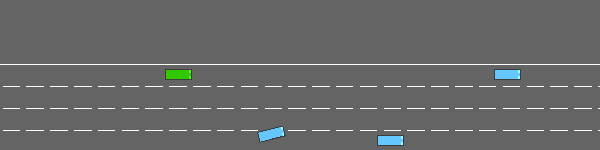

In [1]:
import gymnasium
import highway_env
import numpy as np
import imageio
from IPython.display import Image as IPImage
from matplotlib import pyplot as plt
%matplotlib inline

# Setup
env = gymnasium.make("highway-v0", render_mode="rgb_array")
obs, _ = env.reset()

frames = []

# Collect frames
for _ in range(200):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        break

env.close()

# Add 3-second pause at the end (15 frames at 5 FPS)
frames.extend([frames[-1]] * 15)

# Save to GIF
gif_path = "trajectory.gif"
imageio.mimsave(gif_path, frames, fps=5, loop=0)

# ✅ Display the actual GIF correctly
with open(gif_path, "rb") as f:
    gif_bytes = f.read()

IPImage(data=gif_bytes, format='gif')

crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashTrue
overFalse


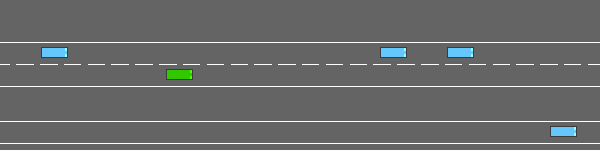

In [2]:
# Setup
env = gymnasium.make("merge-v0", render_mode="rgb_array")
obs, _ = env.reset()

frames = []

# Collect frames
for _ in range(200):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        break

env.close()

# Add 3-second pause at the end (15 frames at 5 FPS)
frames.extend([frames[-1]] * 15)

# Save to GIF
gif_path = "merge_trajectory.gif"
imageio.mimsave(gif_path, frames, fps=5, loop=0)

# ✅ Display the actual GIF correctly
with open(gif_path, "rb") as f:
    gif_bytes = f.read()

IPImage(data=gif_bytes, format='gif')

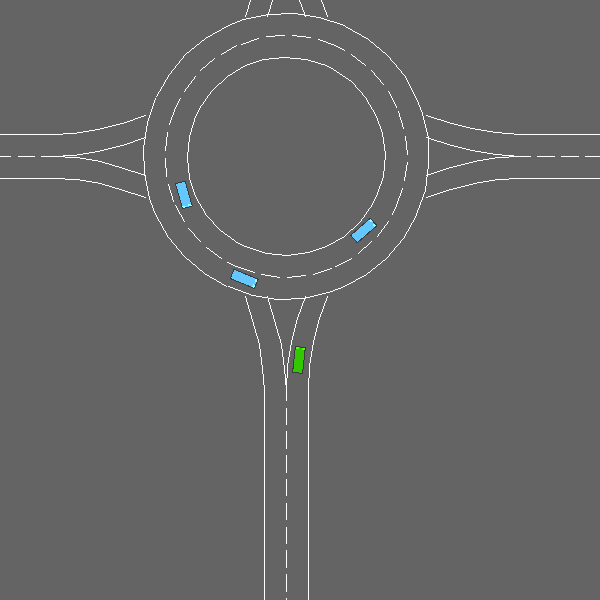

In [3]:
# Setup
env = gymnasium.make("roundabout-v0", render_mode="rgb_array")
obs, _ = env.reset()

frames = []

# Collect frames
for _ in range(200):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        break

env.close()

# Add 3-second pause at the end (15 frames at 5 FPS)
frames.extend([frames[-1]] * 15)

# Save to GIF
gif_path = "roundabout_trajectory.gif"
imageio.mimsave(gif_path, frames, fps=5, loop=0)

# ✅ Display the actual GIF correctly
with open(gif_path, "rb") as f:
    gif_bytes = f.read()

IPImage(data=gif_bytes, format='gif')